In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras import layers
import pandas as pd
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize
x_train /= 255
x_test /= 255

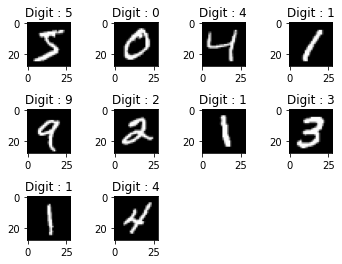

In [4]:
for i in range(10):
  plt.subplot(3,4,i+1)
  plt.imshow(x_train[i],cmap='binary_r')
  plt.title("Digit : {}".format(y_train[i]))
  plt.subplots_adjust(hspace=1)
#plt.imshow(x_train[0])
# np.shape(x_train[0])
# for i in range(28): 
#   np.set_printoptions(linewidth=np.inf)
#   print(x_train[0][i])

In [5]:
#mnist_red
#np.shape(x_train)
shape = np.shape(x_train[1])
img_cnt = len(x_train)
rgb_0 = np.zeros((60000,28,28,3))
rgb_1 = np.zeros((60000,28,28,3))
rgb_2 = np.zeros((60000,28,28,3))
for i in range(img_cnt):
  rgb_0[i] = np.stack((x_train[i],np.zeros(shape),np.zeros(shape)), axis=2)
  rgb_1[i] = np.stack((np.zeros(shape),x_train[i],np.zeros(shape)), axis=2)
  rgb_2[i] = np.stack((np.zeros(shape),np.zeros(shape),x_train[i]), axis=2)
mnist_rgb = np.concatenate((rgb_0, rgb_1, rgb_2))

In [6]:
y_train = np.concatenate((y_train,y_train,y_train))
print(len(y_train))

180000


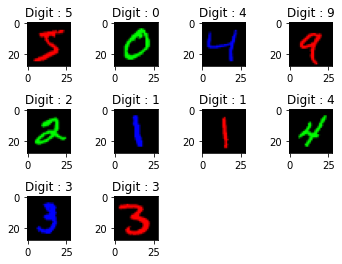

In [7]:
for i in range(10):
  plt.subplot(3,4,i+1)
  plt.imshow(mnist_rgb[(i+60000*i)%179999],cmap='binary_r')
  plt.title("Digit : {}".format(y_train[((i+60000*i)%179999)%60000]))
  plt.subplots_adjust(hspace=1)

In [8]:
mnist_rgb = mnist_rgb.reshape(180000, 28*28*3)
print(np.shape(mnist_rgb))

(180000, 2352)


In [9]:
num_classes = 10
epochs = 5
model = keras.Sequential(
    [
        layers.Dense(32, input_shape=(28 * 28 * 3,), activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ]
)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(mnist_rgb, y_train,epochs=epochs,validation_split=0.2)

Epoch 1/5
4500/4500 [==============================] - 20s 4ms/step - loss: 0.3597 - accuracy: 0.8956 - val_loss: 0.2563 - val_accuracy: 0.9255
Epoch 2/5
4500/4500 [==============================] - 19s 4ms/step - loss: 0.1792 - accuracy: 0.9472 - val_loss: 0.2211 - val_accuracy: 0.9374
Epoch 3/5
4500/4500 [==============================] - 18s 4ms/step - loss: 0.1431 - accuracy: 0.9578 - val_loss: 0.1928 - val_accuracy: 0.9438
Epoch 4/5
4500/4500 [==============================] - 20s 4ms/step - loss: 0.1215 - accuracy: 0.9637 - val_loss: 0.1971 - val_accuracy: 0.9422
Epoch 5/5
4500/4500 [==============================] - 21s 5ms/step - loss: 0.1076 - accuracy: 0.9679 - val_loss: 0.2094 - val_accuracy: 0.9428


In [10]:
x_test = np.stack((x_test,x_test,x_test),axis=3)

In [11]:
x_test = x_test.reshape(10000, 28*28*3)
print(np.shape(x_test))
print(np.shape(y_test))

(10000, 2352)
(10000,)


Test loss: 0.5310654044151306
Test accuracy:  % 92.739999294281


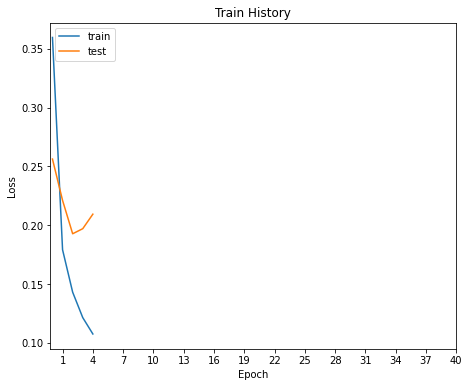

In [12]:
def show_train_history(train_history):
    fig = plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)

    if "loss" in train_history.history.keys():
        plt.plot(train_history.history["loss"])
        
    if "val_loss" in train_history.history.keys():
        plt.plot(train_history.history["val_loss"])

    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.xticks(range(1,41,3))
    plt.ylabel("Loss")
    plt.legend(["train", "test"], loc="upper left")
    plt.show()

scores, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores)
print('Test accuracy:  %', 100*acc)
show_train_history(history)